STARTER PROJECT !!

In [40]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [50]:
def generate_dataset(num_images):
    #image size is 64x64x(rgb), labels are 
    # 0) blue x
    # 1) blue t
    # 2) red x
    # 3) red t
    images = []
    labels = []
    for i in range (num_images):
        image = np.random.randint(0, 256, (64, 64, 3), dtype=np.uint8)
        a, b = np.random.randint(2, 62), np.random.randint(2, 62) #shape center
        label = np.random.randint(0, 4)
        match label:
            case 0:
                shape_coords = [(a, b), (a+1, b+1), (a+2, b+2), (a+1, b-1), (a+2, b-2), (a-1, b-1), (a-2, b-2), (a-1, b+1), (a-2, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([0, 0, 255])
            case 1:
                shape_coords = [(a, b), (a+1, b), (a+2, b), (a-1, b), (a-2, b), (a, b-1), (a, b-2), (a, b+1), (a, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([0, 0, 255])
            case 2:
                shape_coords = [(a, b), (a+1, b+1), (a+2, b+2), (a+1, b-1), (a+2, b-2), (a-1, b-1), (a-2, b-2), (a-1, b+1), (a-2, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([255, 0, 0])
            case 3:
                shape_coords = [(a, b), (a+1, b), (a+2, b), (a-1, b), (a-2, b), (a, b-1), (a, b-2), (a, b+1), (a, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([255, 0, 0])
        images.append(image)
        labels.append(label)
    return images, labels


        

In [51]:
images, labels = generate_dataset(5000)

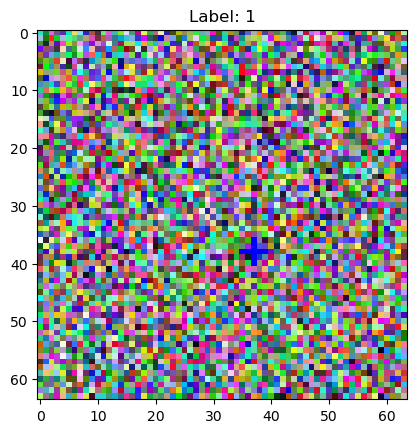

In [52]:
for i in range (10):
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show

In [53]:
from sklearn.model_selection import train_test_split

def preprocess_dataset(images, labels, test_size = 0.2, random_state=42):
    images = np.array(images).astype('float32')/255.0
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return train_images, test_images, train_labels, test_labels




In [54]:
train_images, test_images, train_labels, test_labels = preprocess_dataset(images, labels, 0.2, 42)
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)

In [64]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [65]:
history = model.fit(train_images, train_labels, epochs= 10, validation_split=0.2)


Epoch 1/10
100/100 [==============================] - 5s 41ms/step - loss: 1.4060 - accuracy: 0.2731 - val_loss: 1.3872 - val_accuracy: 0.2587
Epoch 2/10
100/100 [==============================] - 4s 41ms/step - loss: 1.3848 - accuracy: 0.2731 - val_loss: 1.3862 - val_accuracy: 0.2587
Epoch 3/10
100/100 [==============================] - 6s 58ms/step - loss: 1.3851 - accuracy: 0.2725 - val_loss: 1.3870 - val_accuracy: 0.2412
Epoch 4/10
100/100 [==============================] - 7s 65ms/step - loss: 1.3851 - accuracy: 0.2678 - val_loss: 1.3876 - val_accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 6s 64ms/step - loss: 1.3826 - accuracy: 0.2781 - val_loss: 1.3921 - val_accuracy: 0.2587
Epoch 6/10
100/100 [==============================] - 6s 63ms/step - loss: 1.3769 - accuracy: 0.2984 - val_loss: 1.3877 - val_accuracy: 0.2562
Epoch 7/10
100/100 [==============================] - 6s 64ms/step - loss: 1.3400 - accuracy: 0.3594 - val_loss: 1.4117 - val_accuracy: 0.2512

32/32 [==============================] - 0s 10ms/step - loss: 1.7731 - accuracy: 0.3070
Test accuracy: 0.3070000112056732


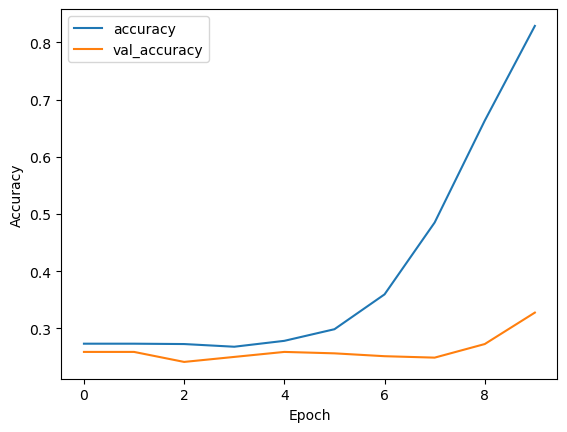

In [66]:
# Evaluation on a test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
